In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('D:/My Projects/fianl  project Doc/final_project_csv')
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size,year,month,day
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,24924.50,1,151315,2010,2,5
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,2,50605.27,1,151315,2010,2,5
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,3,13740.12,1,151315,2010,2,5
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,4,39954.04,1,151315,2010,2,5
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,5,32229.38,1,151315,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,93,2487.80,2,118221,2012,10,26
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,94,5203.31,2,118221,2012,10,26
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,95,56017.47,2,118221,2012,10,26
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,97,6817.48,2,118221,2012,10,26


In [8]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]]
y=df.Weekly_Sales

In [9]:
X

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size,year,month,day
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,1,151315,2010,2,5
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,2,1,151315,2010,2,5
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,3,1,151315,2010,2,5
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,4,1,151315,2010,2,5
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,5,1,151315,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,93,2,118221,2012,10,26
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,94,2,118221,2012,10,26
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,95,2,118221,2012,10,26
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,97,2,118221,2012,10,26


In [10]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X

array([[-1.65819926, -0.96379804, -1.72083413, ..., -1.21548691,
        -1.37194493, -1.21929331],
       [-1.65819926, -0.96379804, -1.72083413, ..., -1.21548691,
        -1.37194493, -1.21929331],
       [-1.65819926, -0.96379804, -1.72083413, ..., -1.21548691,
        -1.37194493, -1.21929331],
       ...,
       [ 1.78325781, -0.06721947,  1.13622153, ...,  1.29431678,
         1.09474444,  1.17973642],
       [ 1.78325781, -0.06721947,  1.13622153, ...,  1.29431678,
         1.09474444,  1.17973642],
       [ 1.78325781, -0.06721947,  1.13622153, ...,  1.29431678,
         1.09474444,  1.17973642]])

In [11]:
y=np.array(y)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         2,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,351 (114.65 KB)

 Trainable params: 29,351 (114.65 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/24
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 59s 6ms/step - loss: 495315456.0000 - mean_absolute_error: 13695.4609 - mean_absolute_percentage_error: 1675686144.0000 - mean_squared_error: 495315456.0000 - mean_squared_logarithmic_error: 6.9405 - val_loss: 377608448.0000 - val_mean_absolute_error: 12109.0811 - val_mean_absolute_percentage_error: 2260292352.0000 - val_mean_squared_error: 377608448.0000 - val_mean_squared_logarithmic_error: 4.4055
Epoch 2/24
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - loss: 425397696.0000 - mean_absolute_error: 12387.2812 - mean_absolute_percentage_error: 1498656896.0000 - mean_squared_error: 425397696.0000 - mean_squared_logarithmic_error: 4.1318 - val_loss: 372980736.0000 - val_mean_absolute_error: 11691.5234 - val_mean_absolute_percentage_error: 2038014208.0000 - val_mean_squared_error: 372980736.0000 - val_mean_squared_logarithmic_error: 4.1350
Epoch 3/24
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 416950176.0000 - mean_absolute_error: 12306.326

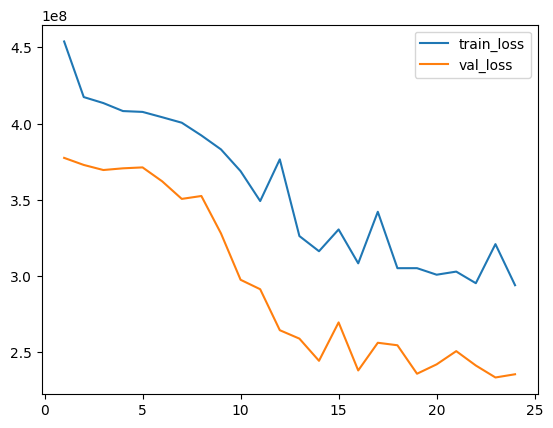

In [13]:
model5=Sequential()
#input dimension is 4-neuron --> Developer scope
model5.add(Dense(120,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-1
model5.add(Dropout(0.3))
model5.add(Dense(100,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-2
model5.add(Dropout(0.2))
model5.add(Dense(80,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-3
model5.add(Dropout(0.25))
model5.add(Dense(60,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-4
model5.add(Dropout(0.3))
model5.add(Dense(30,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-5
model5.add(Dropout(0.5))
model5.add(Dense(10,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-6
model5.add(Dropout(0.2))
model5.add(Dense(1)) #output layer
#model5.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


model5.compile(optimizer=Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanSquaredLogarithmicError()])
#by default learning rate is 0.01



model5.summary()

result5=model5.fit(X_train,y_train,epochs=24,validation_split=0.2,batch_size=32)

result_df5=pd.DataFrame(result5.history)
result_df5


plt.plot(range(1,25),result_df5['loss'],label="train_loss")
plt.plot(range(1,25),result_df5['val_loss'],label="val_loss")
plt.legend()
plt.show()


In [20]:
# Save the model
model5.save('final_model.h5')


In [22]:
from tensorflow.keras.models import load_model

custom_objects = {'LeakyReLU': LeakyReLU}

# Load the model with custom objects
loaded_model5 = load_model('final_model.h5', custom_objects=custom_objects)
# Load the model


In [24]:
loaded_model5.predict(X_test)

1977/1977 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


array([[16765.12  ],
       [ 8528.382 ],
       [14875.183 ],
       ...,
       [ 4519.9004],
       [35485.61  ],
       [11134.581 ]], dtype=float32)

c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\avmoh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 210)            │        53,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 210)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │        42,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 180)            │        36,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 150)            │        27,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 120)            │        18,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,419 (818.04 KB)

 Trainable params: 209,419 (818.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - loss: 590023040.0000 - mean_absolute_error: 13330.7344 - mean_absolute_percentage_error: 1864673536.0000 - mean_squared_error: 590023040.0000 - mean_squared_logarithmic_error: 7.8983 - val_loss: 380882048.0000 - val_mean_absolute_error: 11668.5176 - val_mean_absolute_percentage_error: 1961053056.0000 - val_mean_squared_error: 380882048.0000 - val_mean_squared_logarithmic_error: 4.1712
Epoch 2/10
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 69s 8ms/step - loss: 483359200.0000 - mean_absolute_error: 12629.3994 - mean_absolute_percentage_error: 1837131648.0000 - mean_squared_error: 483359200.0000 - mean_squared_logarithmic_error: 4.1732 - val_loss: 418529120.0000 - val_mean_absolute_error: 11253.0518 - val_mean_absolute_percentage_error: 1507515904.0000 - val_mean_squared_error: 418529120.0000 - val_mean_squared_logarithmic_error: 3.8434
Epoch 3/10
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - loss: 1311692160.0000 - mean_absolute_error: 12485.52

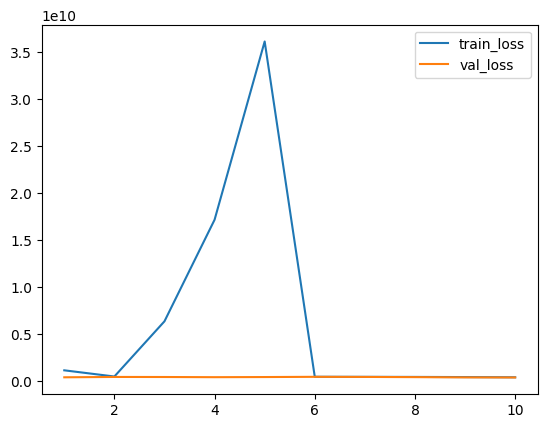

In [25]:
model=Sequential()
#input dimension is 17
# -neuron --> Developer scope
model.add(Dense(256,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-1
model.add(Dropout(0.3))
model.add(Dense(210,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-2
model.add(Dropout(0.2))
model.add(Dense(200,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-3
model.add(Dropout(0.20))
model.add(Dense(180,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-4
model.add(Dropout(0.3))
model.add(Dense(150,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-5
model.add(Dropout(0.5))
model.add(Dense(120,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-6
model.add(Dropout(0.3))
model.add(Dense(100,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-7
model.add(Dropout(0.2))
model.add(Dense(80,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-8
model.add(Dropout(0.25))
model.add(Dense(60,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-9
model.add(Dropout(0.3))
model.add(Dense(30,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-10
model.add(Dropout(0.5))
model.add(Dense(10,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-11
model.add(Dropout(0.2))
model.add(Dense(1)) #output layer
#model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


model.compile(optimizer=Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanSquaredLogarithmicError()])
#by default learning rate is 0.01



model.summary()

result=model.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=32)

result_df=pd.DataFrame(result.history)
result_df


plt.plot(range(1,11),result_df['loss'],label="train_loss")
plt.plot(range(1,11),result_df['val_loss'],label="val_loss")
plt.legend()
plt.show()


In [26]:
model.save("Overmodel.h5")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 210)            │        53,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 210)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 200)            │        42,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 180)            │        36,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 180)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 150)            │        27,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 120)            │        18,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 80)             │         8,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 60)             │         4,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,419 (818.04 KB)

 Trainable params: 209,419 (818.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - loss: 488923808.0000 - mean_absolute_error: 13256.5898 - mean_absolute_percentage_error: 2275779328.0000 - mean_squared_error: 488923808.0000 - mean_squared_logarithmic_error: 5.3890 - val_loss: 461577856.0000 - val_mean_absolute_error: 11517.3350 - val_mean_absolute_percentage_error: 1210716032.0000 - val_mean_squared_error: 461577856.0000 - val_mean_squared_logarithmic_error: 3.5812
Epoch 2/15
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 2266268416.0000 - mean_absolute_error: 12557.4219 - mean_absolute_percentage_error: 1272782336.0000 - mean_squared_error: 2266268416.0000 - mean_squared_logarithmic_error: 4.2055 - val_loss: 480689280.0000 - val_mean_absolute_error: 11607.6074 - val_mean_absolute_percentage_error: 1142641024.0000 - val_mean_squared_error: 480689280.0000 - val_mean_squared_logarithmic_error: 3.5069
Epoch 3/15
8959/8959 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - loss: 423801632.0000 - mean_absolute_error: 12401.9

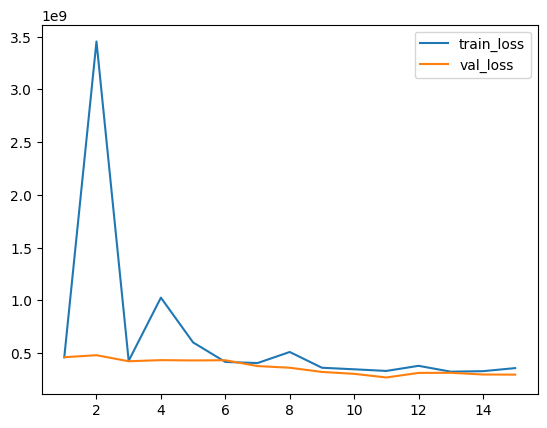

In [31]:
model1=Sequential()
#input dimension is 17-neuron --> Developer scope
model1.add(Dense(256,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-1
model1.add(Dropout(0.3))
model1.add(Dense(210,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-2
model1.add(Dropout(0.2))
model1.add(Dense(200,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-3
model1.add(Dropout(0.20))
model1.add(Dense(180,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-4
model1.add(Dropout(0.3))
model1.add(Dense(150,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-5
model1.add(Dropout(0.5))
model1.add(Dense(120,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-6
model1.add(Dropout(0.3))
model1.add(Dense(100,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-7
model1.add(Dropout(0.2))
model1.add(Dense(80,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-8
model1.add(Dropout(0.25))
model1.add(Dense(60,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-9
model1.add(Dropout(0.3))
model1.add(Dense(30,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-10
model1.add(Dropout(0.5))
model1.add(Dense(10,input_shape=(X_train.shape[1],),activation=LeakyReLU(alpha=0.01))) #hidden layer-11
model1.add(Dropout(0.2))
model1.add(Dense(1)) #output layer
#model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


model1.compile(optimizer=Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanAbsolutePercentageError(),tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanSquaredLogarithmicError()])
#by default learning rate is 0.01



model1.summary()

result1=model1.fit(X_train,y_train,epochs=15,validation_split=0.2,batch_size=32)

result_df1=pd.DataFrame(result1.history)
result_df1

model1.save("Gendralized model.h5")


plt.plot(range(1,16),result_df1['loss'],label="train_loss")
plt.plot(range(1,16),result_df1['val_loss'],label="val_loss")
plt.legend()

plt.show()


In [32]:
model1.save("Gendralised_model_f.h5")

In [ ]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

    
